In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Data_Set.csv', encoding = 'cp1252')

In [4]:
dataset.head()

,ï»¿survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,25-03-2020,NaN,US,33.9031,-118.1494,500,male,50_60,184,80,...,0,0,0,0,0,0,0,0,100.0,0.194
1,26-03-2020,EU,NL,52.0218,4.5357,5,female,80_90,164,84,...,0,0,0,0,1,0,0,0,100.0,3.483
2,28-03-2020,SA,BR,-26.8740,-48.7028,10,female,20_30,170,64,...,0,0,0,0,0,0,0,0,100.0,0.050
3,27-03-2020,EU,CH,47.1921,8.1766,20,male,90_100,132,124,...,0,0,0,1,0,0,0,0,100.0,13.973
4,27-03-2020,NaN,US,40.5733,-111.9107,5,male,30_40,184,118,...,0,0,1,0,1,1,0,0,100.0,0.116


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ï»¿survey_date          5111 non-null   object 
 1   region                  1485 non-null   object 
 2   country                 5109 non-null   object 
 3   ip_latitude             5111 non-null   float64
 4   ip_longitude            5111 non-null   float64
 5   ip_accuracy             5111 non-null   int64  
 6   sex                     5111 non-null   object 
 7   age                     5111 non-null   object 
 8   height                  5111 non-null   int64  
 9   weight                  5111 non-null   int64  
 10  bmi                     5111 non-null   float64
 11  blood_type              5111 non-null   object 
 12  insurance               3943 non-null   object 
 13  income                  3943 non-null   object 
 14  race                    3943 non-null   

In [6]:
dataset = dataset.rename(columns={'ï»¿survey_date': 'survey_date'})

In [7]:
##Checking the Nan values.
dataset.isnull().sum()

survey_date                  0
region                    3626
country                      2
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_posi

<AxesSubplot:>

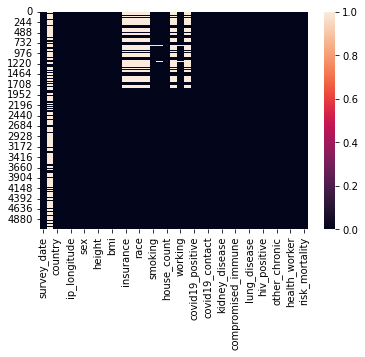

In [8]:
#visulaising the Nan with the help of heatmap.
sns.heatmap(dataset.isnull())

In [9]:
##Droping the un-necessary collumns.
dataset = dataset.drop(columns=['ip_latitude', 'ip_longitude', 'ip_accuracy', 'immigrant', 'house_count'])

<AxesSubplot:>

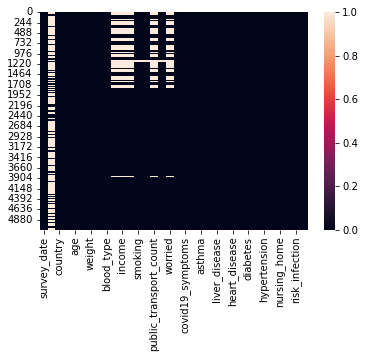

In [10]:
sns.heatmap(dataset.isnull())

In [11]:
dataset = dataset.drop(columns=['region'])

<AxesSubplot:>

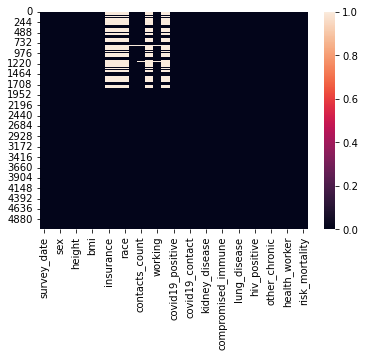

In [12]:
sns.heatmap(dataset.isnull())

In [13]:
#adding a collumn as country_name
countries_with_ALPHA2 = {
    'US' : 'United States', 
   'NL' : 'Netherlands', 
   'BR' : 'Brazil', 
   'CH' : 'Switzerland', 
   'ES' : 'Spain', 
   'AU' : 'Australia', 
   'RU' : 'Russia', 
   'JP' : 'Japan', 
   'MT' : 'Malta', 
   'GB' : 'Britain', 
   'NZ' : 'NewZealand',
   'PK' : 'Pakistan', 
   'CL' : 'Chile', 
   'IE' : 'Ireland', 
   'UA' : 'Ukraine', 
   'CA' : 'Canada', 
   'IN' : 'India', 
   'BE' : 'Belgium', 
   'BH' : 'Bhutan', 
   'HU' : 'Hungary', 
   'MX' : 'Mexico', 
   'GR' : 'Greece',
   'IT' : 'Italy', 
   'DE' : 'Germany', 
   'SG' : 'Singapore', 
   'HK' : 'Hong Kong', 
   'EG' : 'Egypt', 
   'RS' : 'Serbia', 
   'PE' : 'Peru', 
   'FR' : 'France', 
   'CO' : 'Colombia', 
   'PS' : 'Palestine', 
   'DO' : 'Dominican Republic',
   'SE' : 'Sweden', 
   'MK' : 'North Macedonia', 
   'PT' : 'Portugal', 
   'TH' : 'Thailand', 
   'RO' : 'Romania', 
   'PH' : 'Philippines', 
   'LT' : 'Lithuania', 
   'AR' : 'Argentina', 
   'DK' : 'Denmark', 
   'GE' : 'Georgia', 
   'EC' : 'Ecuador',
   'SA' : 'South Africa', 
   'PA' : 'Panama', 
   'ZA' : 'South Africa', 
   'AM' : 'Armenia', 
   'TR' : 'Turkey', 
   'BD' : 'Bangladesh', 
   'DZ' : 'Algeria', 
   'QA' : 'Qatar', 
   'IQ' : 'Iraq', 
   'IL' : 'Israel', 
   'ID' : 'Indonesia',
   'AE' : 'United Arab Emirates', 
   'GT' : 'Guatemala', 
   'CZ' : 'Czechia', 
   'IR' : 'Iran', 
   'KZ' : 'Kazakhstan', 
   'BG' : 'Bulgaria', 
   'NO' : 'Norway', 
   'AT' : 'Austria', 
   'MD' : 'Moldova', 
   'SK' : 'Slovakia',
   'HN' : 'Honduras', 
   'ET' : 'Ethiopia', 
   'SV' : 'El Salvador', 
   'PL' : 'Poland', 
   'MO' : 'Macao', 
   'HR' : 'Croatia', 
   'BS' : 'The Bahamas', 
   'CR' : 'Costa Rica', 
   'SI' : 'Slovenia', 
   'AD' : 'Andorra', 
   'LU' : 'Luxembourg',
   'BA' : 'Bosnia', 
   'KR' : 'South Korea', 
   'NP' : 'Nepal', 
   'MU' : 'Mauritius', 
   'PR' : 'Puerto Rico', 
   'FI' : 'Finland', 
   'MZ' : 'Mozambique', 
   'VI' : 'U.S. Virgin Islands', 
   'MY' : 'Malaysia', 
   'LV' : 'Latvia', 
   'AW' : 'Aruba',
   'MM' : 'Myanmar', 
   'KY' : 'Cayman Islands', 
   'KE' : 'Kenya'
}

In [14]:
type(countries_with_ALPHA2)

dict

In [15]:
def convertIntoName(countryCode):
    # print(countryCode, countries_with_ALPHA2[countryCode['country']])
    for code in countries_with_ALPHA2.keys():
        if(countryCode['country'] == code):
            print(countries_with_ALPHA2.get(code))
            return countries_with_ALPHA2.get(code)

In [45]:
# dataset['country_name'] = dataset.apply(lambda row: convertIntoName(row), axis=1)

In [16]:
dataset = dataset.drop(columns=['country'])

In [17]:
dataset

,survey_date,sex,age,height,weight,bmi,blood_type,insurance,income,race,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,25-03-2020,male,50_60,184,80,23.6,unknown,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,100.0,0.194
1,26-03-2020,female,80_90,164,84,31.2,unknown,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,100.0,3.483
2,28-03-2020,female,20_30,170,64,22.1,ap,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,100.0,0.050
3,27-03-2020,male,90_100,132,124,71.1,op,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,100.0,13.973
4,27-03-2020,male,30_40,184,118,34.8,op,NaN,NaN,NaN,...,0,0,1,0,1,1,0,0,100.0,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,07-07-2020,female,70_80,166,66,23.9,op,yes,high,white,...,0,0,0,0,0,0,0,0,5.0,1.496
5107,07-07-2020,male,70_80,168,70,24.8,bp,yes,med,asian,...,0,0,0,0,0,0,0,0,5.0,3.510
5108,08-07-2020,male,70_80,182,82,24.7,op,yes,high,white,...,0,0,0,0,1,0,0,0,5.0,2.171
5109,06-07-2020,male,50_60,184,80,23.6,unknown,yes,high,white,...,0,0,0,0,0,0,0,0,5.0,0.557


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   sex                     5111 non-null   object 
 2   age                     5111 non-null   object 
 3   height                  5111 non-null   int64  
 4   weight                  5111 non-null   int64  
 5   bmi                     5111 non-null   float64
 6   blood_type              5111 non-null   object 
 7   insurance               3943 non-null   object 
 8   income                  3943 non-null   object 
 9   race                    3943 non-null   object 
 10  smoking                 5072 non-null   object 
 11  contacts_count          5065 non-null   float64
 12  public_transport_count  3943 non-null   float64
 13  working                 5065 non-null   object 
 14  worried                 3943 non-null   

In [20]:
dataset['covid19_contact'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
dataset = dataset.astype({"age": int, 
                          "covid19_positive": bool, 
                          "covid19_symptoms": bool, 
                          "covid19_contact": bool, 
                          "asthma": bool, 
                          "kidney_disease": bool, 
                          "liver_disease": bool, 
                          "compromised_immune": bool, 
                          "heart_disease": bool,
                          "lung_disease": bool,
                          "diabetes": bool,
                          "hiv_positive": bool,
                          "hypertension": bool,
                          "other_chronic": bool,
                          "nursing_home": bool,
                          "health_worker": bool,
                          "health_worker": bool,
                          "health_worker": bool,
})

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   sex                     5111 non-null   object 
 2   age                     5111 non-null   int32  
 3   height                  5111 non-null   int64  
 4   weight                  5111 non-null   int64  
 5   bmi                     5111 non-null   float64
 6   blood_type              5111 non-null   object 
 7   insurance               3943 non-null   object 
 8   income                  3943 non-null   object 
 9   race                    3943 non-null   object 
 10  smoking                 5072 non-null   object 
 11  contacts_count          5065 non-null   float64
 12  public_transport_count  3943 non-null   float64
 13  working                 5065 non-null   object 
 14  worried                 3943 non-null   

<AxesSubplot:>

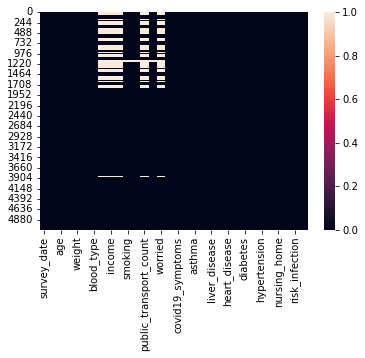

In [23]:
sns.heatmap(dataset.isnull())

##Handeling Nan Values

In [24]:
dataset['insurance'] = dataset['insurance'].fillna(dataset['insurance'].mode()[0])
dataset['income'] = dataset['income'].fillna(dataset['income'].mode()[0])
dataset['race'] = dataset['race'].fillna(dataset['race'].mode()[0])
dataset['worried'] = dataset['worried'].fillna(dataset['worried'].mode()[0])
dataset['public_transport_count'] = dataset['race'].fillna(dataset['race'].mode()[0])
dataset['smoking'] = dataset['smoking'].fillna(dataset['smoking'].mode()[0])

##Droping the Left Records

In [25]:
dataset.dropna()

,survey_date,sex,age,height,weight,bmi,blood_type,insurance,income,race,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
2,28-03-2020,female,2030,170,64,22.1,ap,yes,med,white,...,False,False,False,False,False,False,False,False,100.0,0.050
5,31-03-2020,female,3040,162,66,25.1,ap,yes,med,white,...,False,False,False,False,False,False,False,False,100.0,0.050
6,01-04-2020,male,4050,174,84,27.7,ap,yes,med,white,...,False,False,False,False,False,False,False,False,100.0,0.748
7,05-04-2020,female,3040,160,54,21.0,op,yes,med,white,...,False,False,False,False,False,False,False,False,100.0,0.050
8,05-04-2020,male,2030,180,84,25.9,unknown,yes,med,white,...,False,False,False,False,False,False,False,False,100.0,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,07-07-2020,female,7080,166,66,23.9,op,yes,high,white,...,False,False,False,False,False,False,False,False,5.0,1.496
5107,07-07-2020,male,7080,168,70,24.8,bp,yes,med,asian,...,False,False,False,False,False,False,False,False,5.0,3.510
5108,08-07-2020,male,7080,182,82,24.7,op,yes,high,white,...,False,False,False,False,True,False,False,False,5.0,2.171
5109,06-07-2020,male,5060,184,80,23.6,unknown,yes,high,white,...,False,False,False,False,False,False,False,False,5.0,0.557


In [26]:
# Now checking the size of the resulted dataset.
dataset.shape

(5111, 32)

In [27]:
# We can see that blood type contans a wired value as 'UNKNOWN'...
mode_of_blood_type = dataset['blood_type'].value_counts()
print( mode_of_blood_type )

# I'm so confused what to do..
dataset["blood_type"].replace(
    to_replace= "unknown", 
    value = "ap",
    inplace= True
)
dataset['blood_type']

unknown    1498
ap         1195
op         1171
on          384
bp          349
an          225
abp         177
bn           77
abn          35
Name: blood_type, dtype: int64


0       ap
1       ap
2       ap
3       op
4       op
        ..
5106    op
5107    bp
5108    op
5109    ap
5110    ap
Name: blood_type, Length: 5111, dtype: object

In [57]:
#moving the countries dataframe to first postion

# dataset.insert(0, 'country', dataset.pop('country_name'))

In [28]:
dataset.skew().sort_values(ascending=False)

C:\Users\Prajwal\AppData\Local\Temp/ipykernel_584/681945877.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew().sort_values(ascending=False)


hiv_positive          15.508909
risk_mortality        13.180574
nursing_home          10.401023
liver_disease         10.175924
age                   10.085116
kidney_disease         7.964242
lung_disease           6.159167
heart_disease          4.768362
health_worker          3.653815
compromised_immune     3.605102
other_chronic          3.341092
diabetes               2.988074
covid19_contact        2.369179
covid19_symptoms       2.354682
asthma                 2.284441
bmi                    2.205616
hypertension           1.652573
weight                 1.203467
contacts_count         1.001026
covid19_positive       0.557063
risk_infection         0.406947
height                -0.444816
worried               -0.692078
dtype: float64

age


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


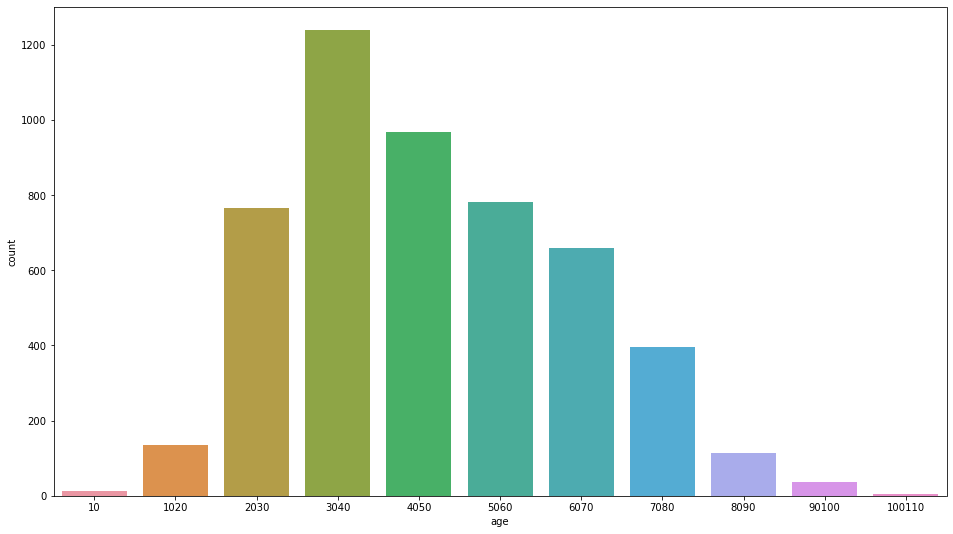

height


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


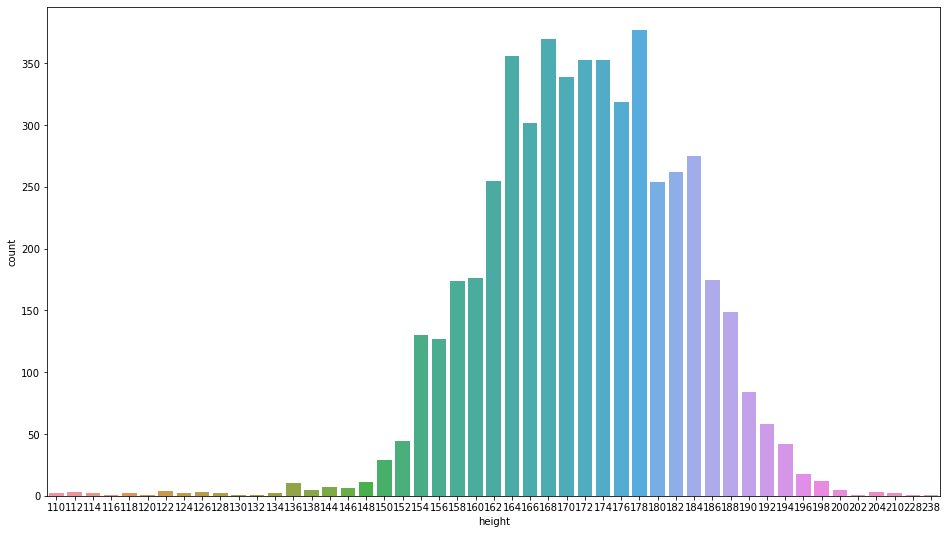

weight


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


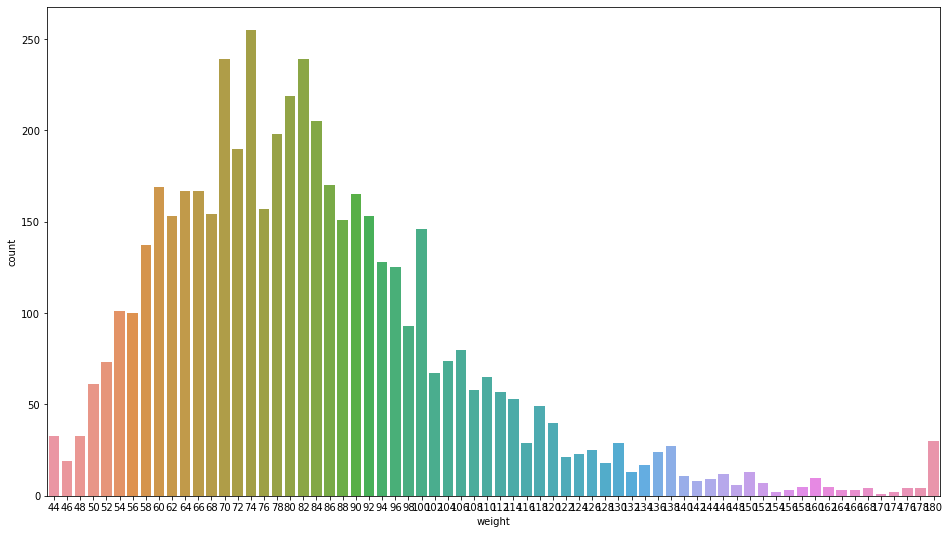

bmi


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


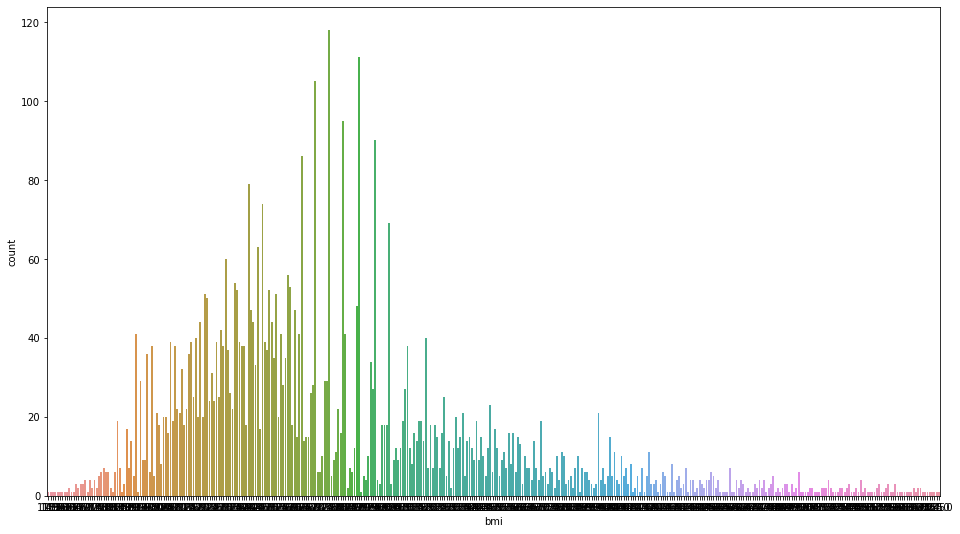

blood_type


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


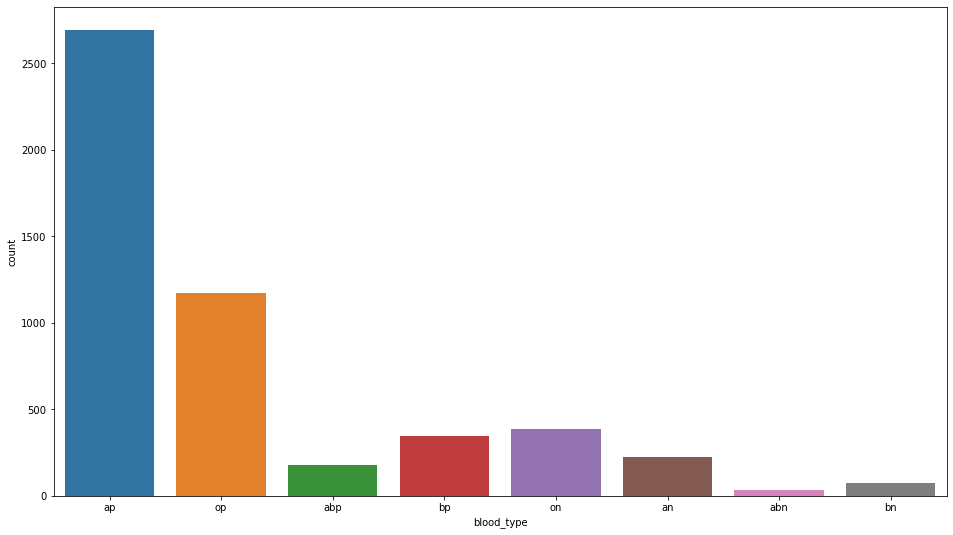

insurance


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


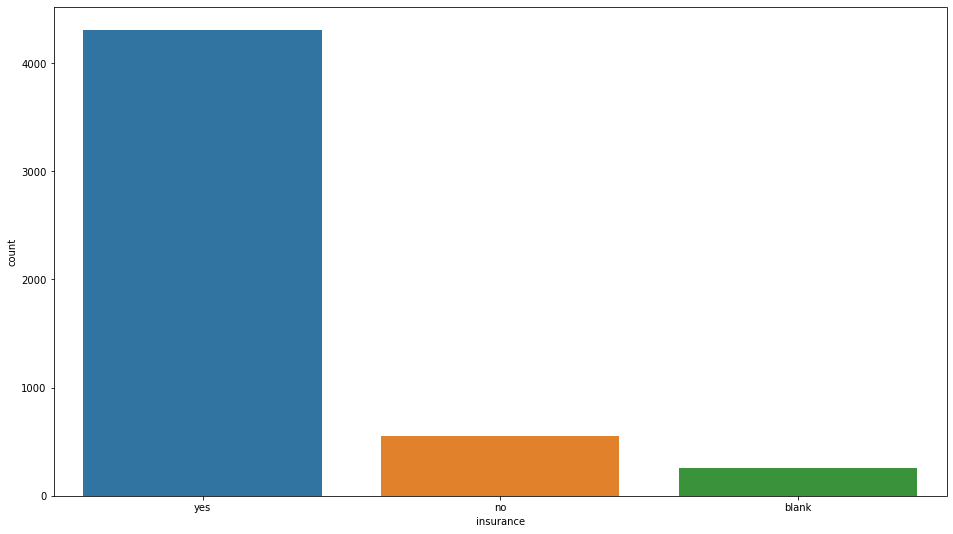

income


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


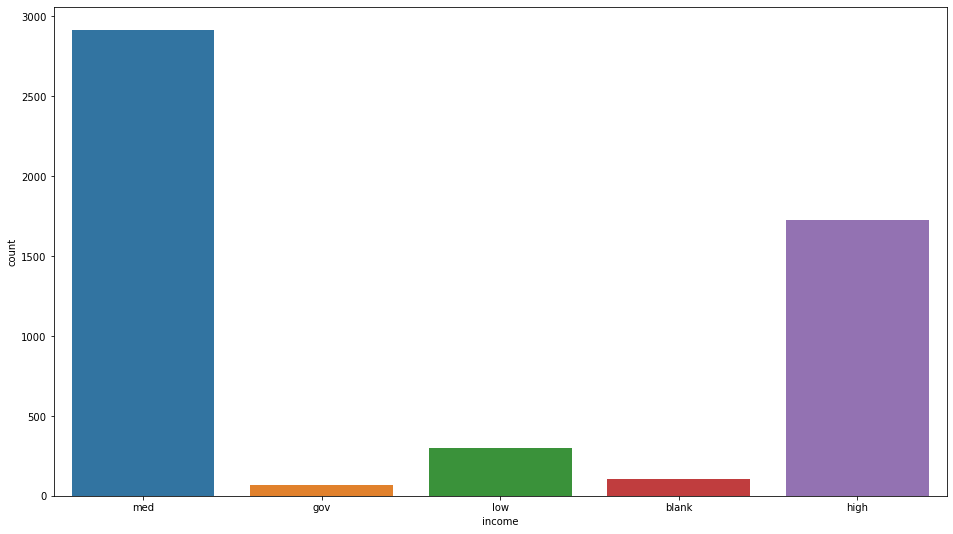

race


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


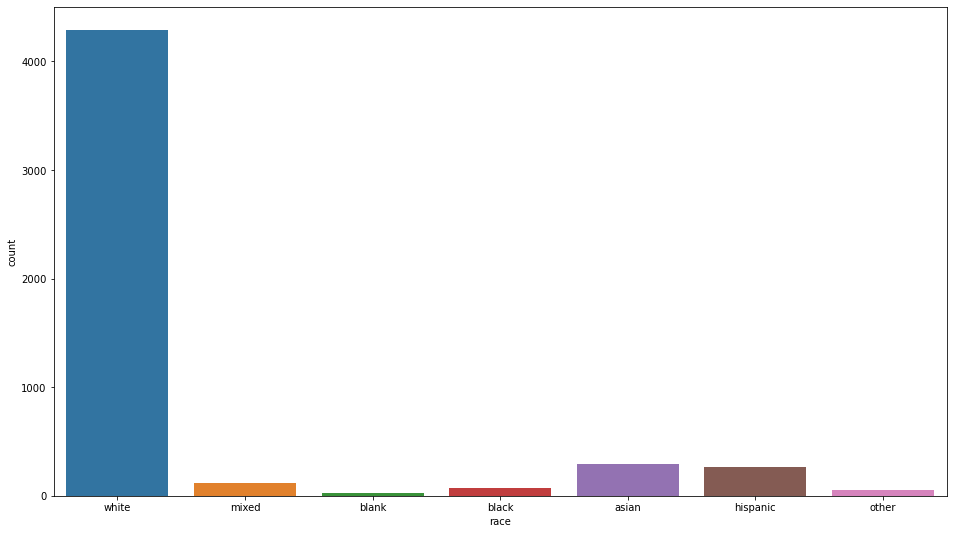

smoking


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


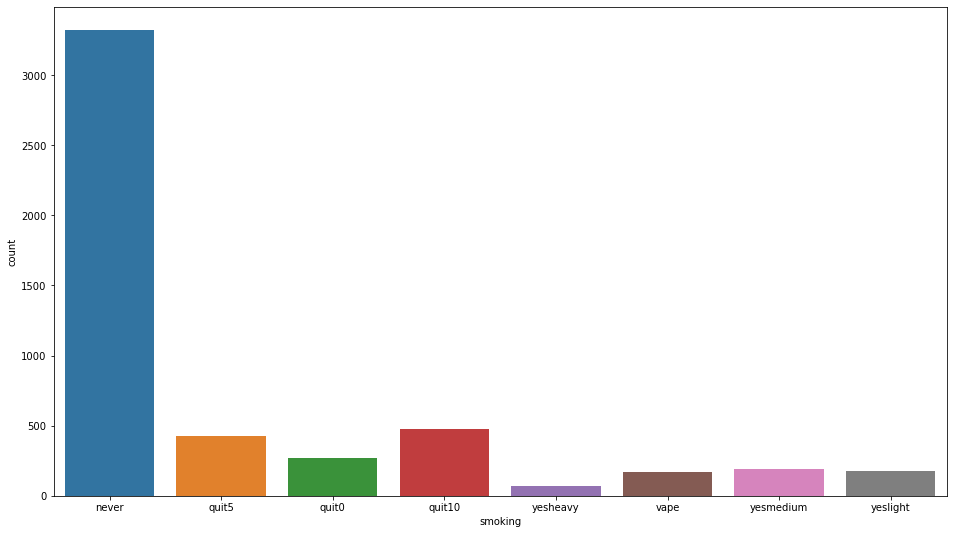

public_transport_count


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


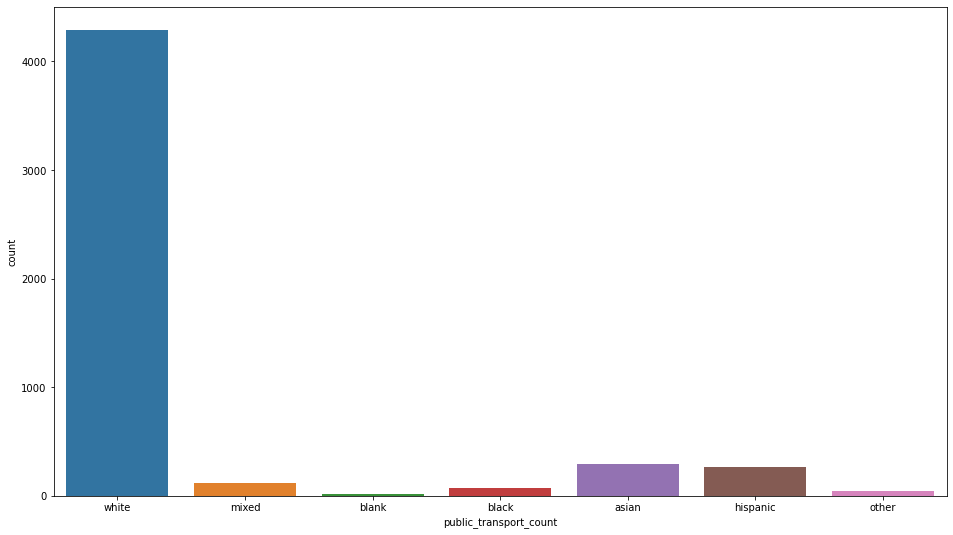

working


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


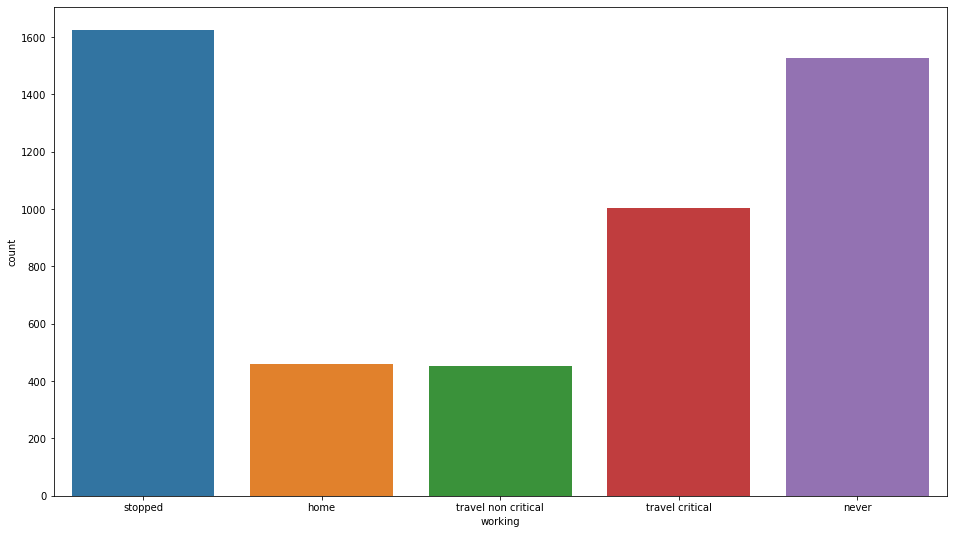

worried


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


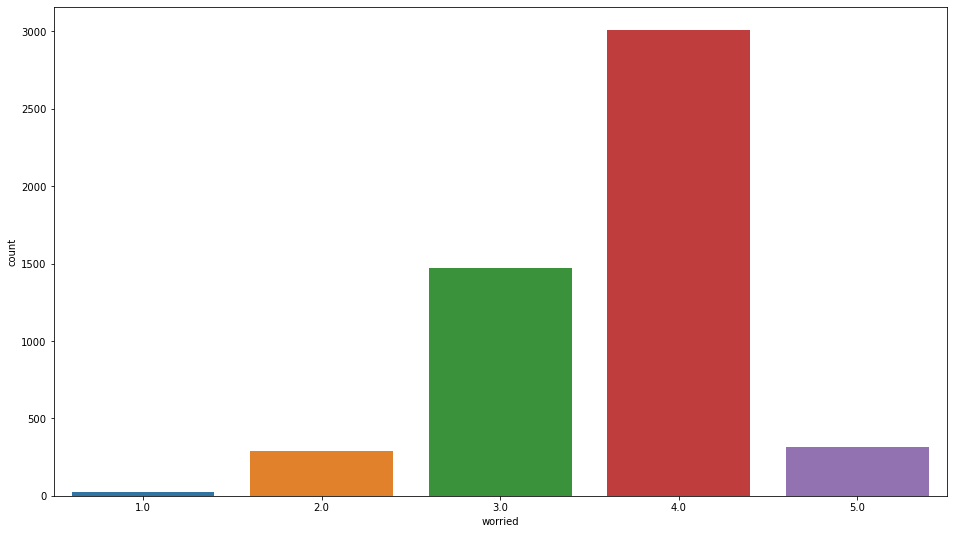

covid19_positive


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


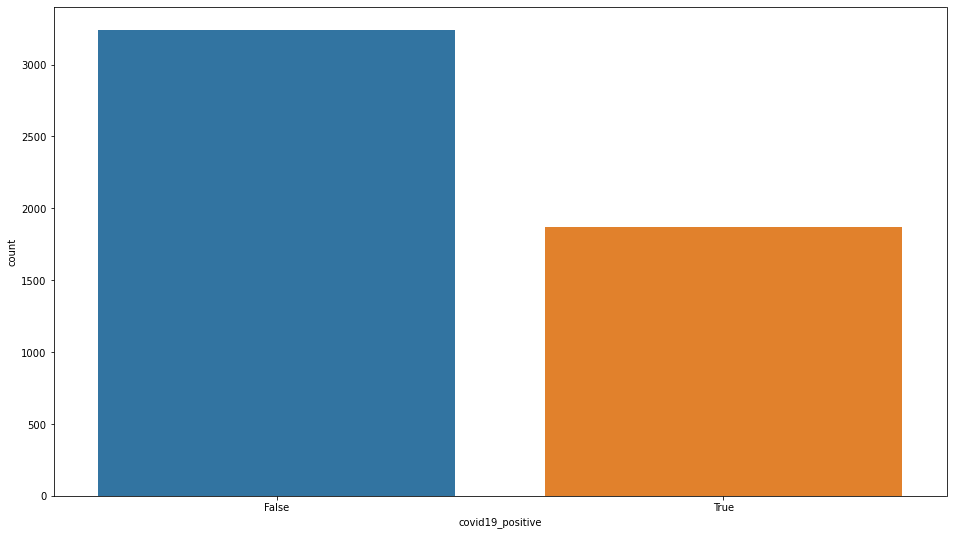

covid19_symptoms


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


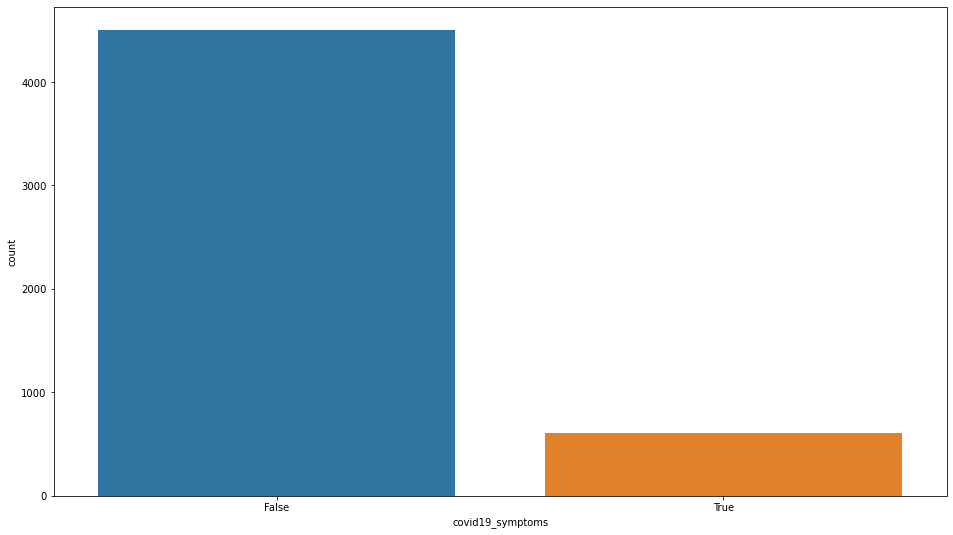

covid19_contact


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


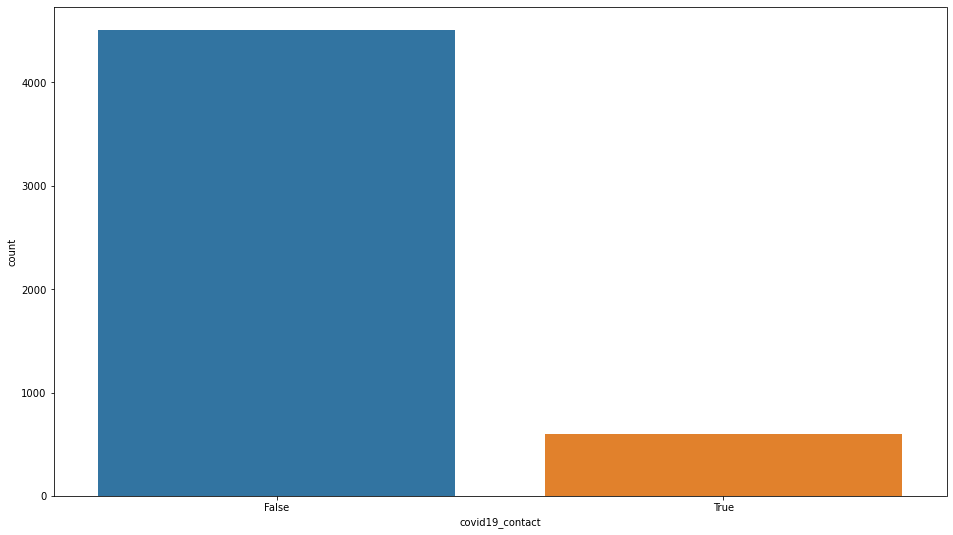

asthma


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


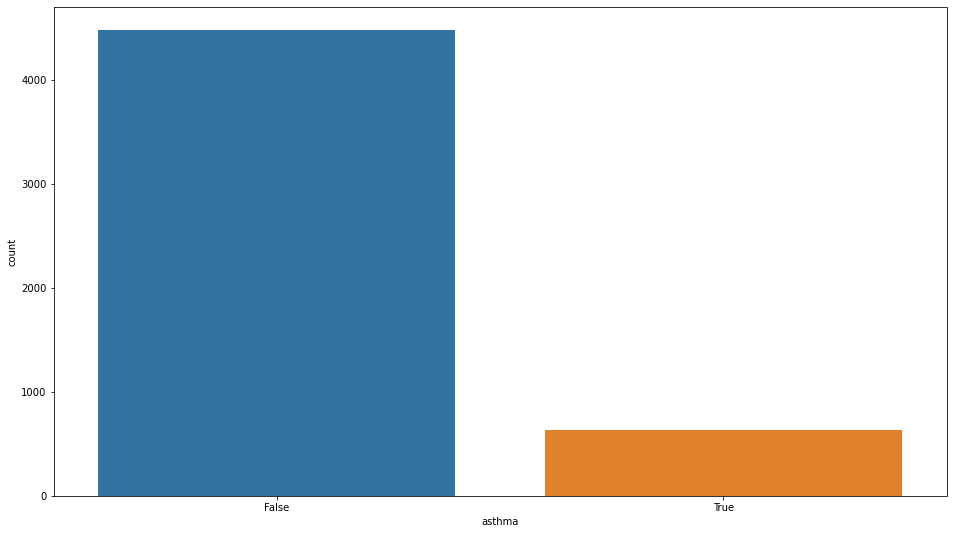

kidney_disease


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


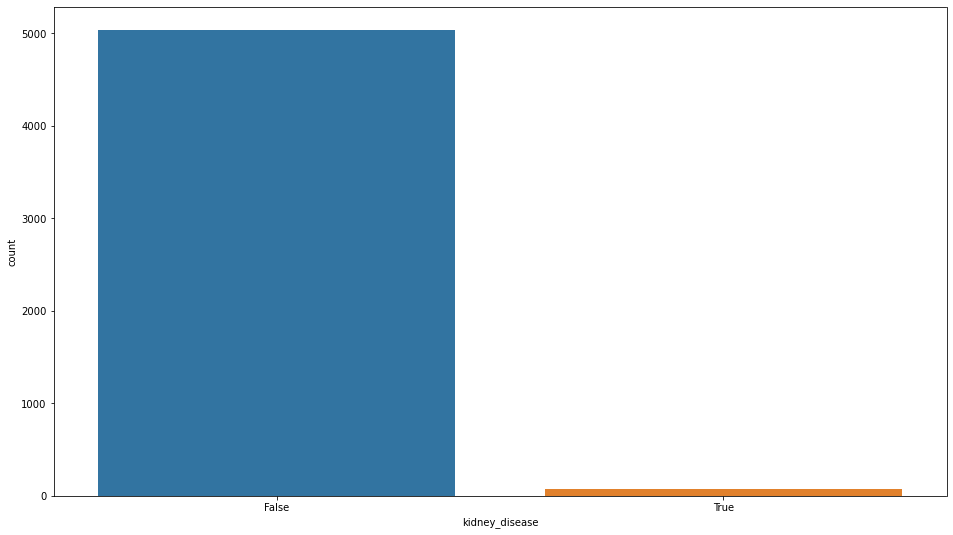

liver_disease


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


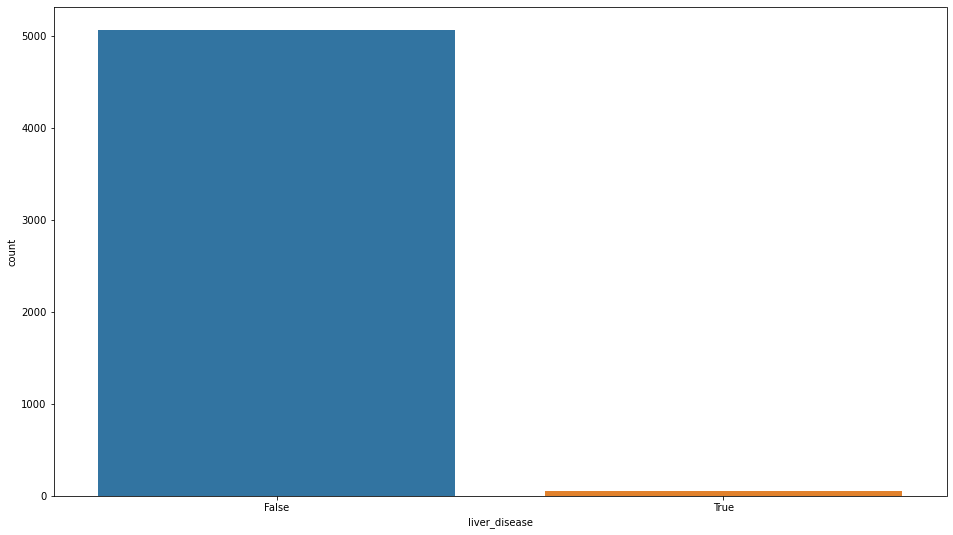

compromised_immune


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


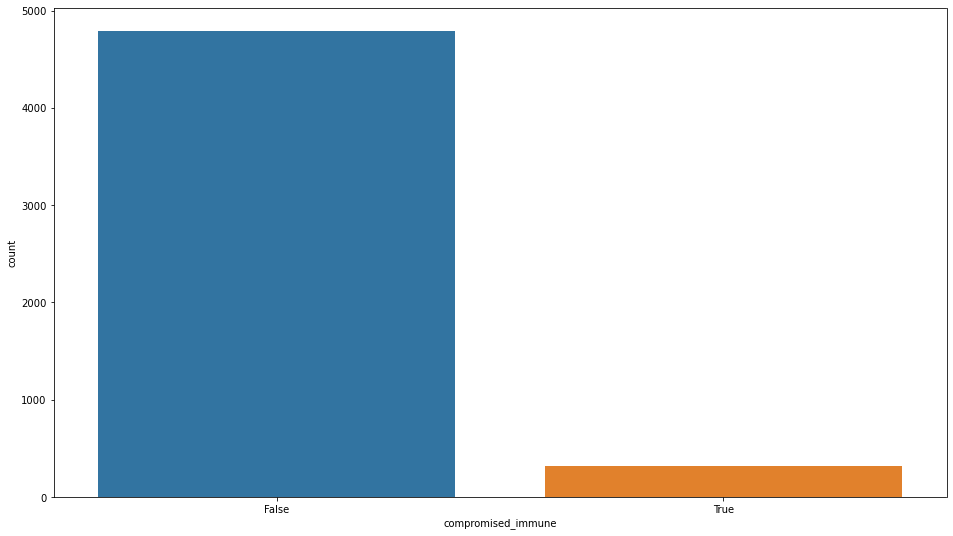

heart_disease


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


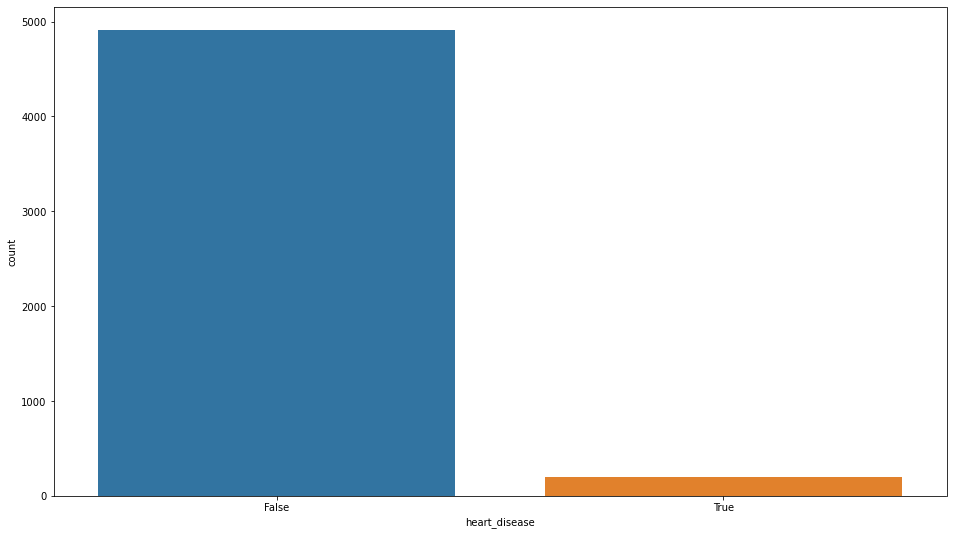

lung_disease


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


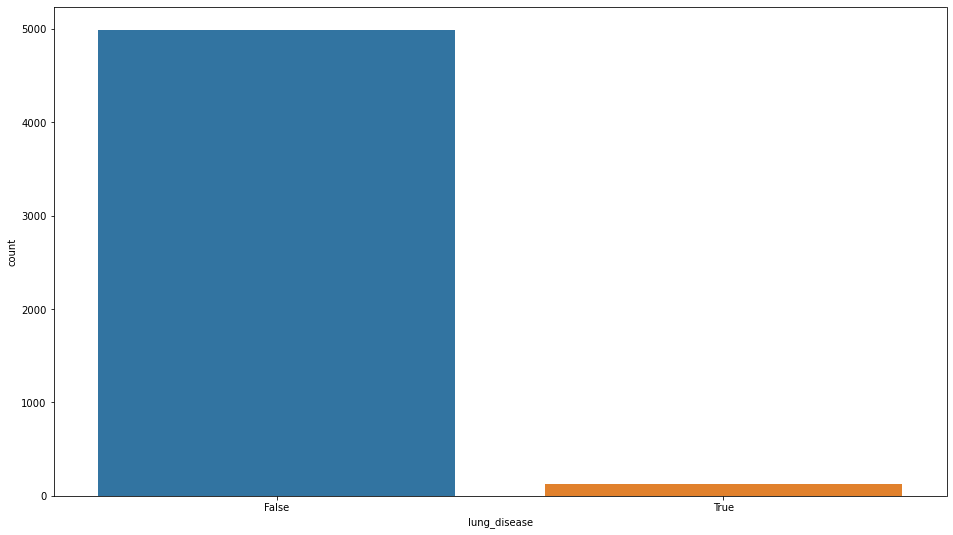

diabetes


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


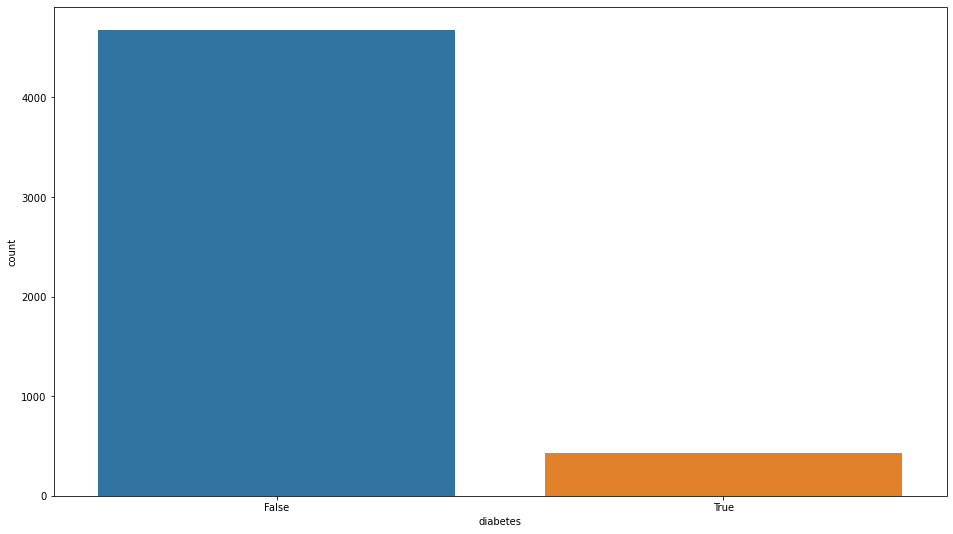

hiv_positive


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


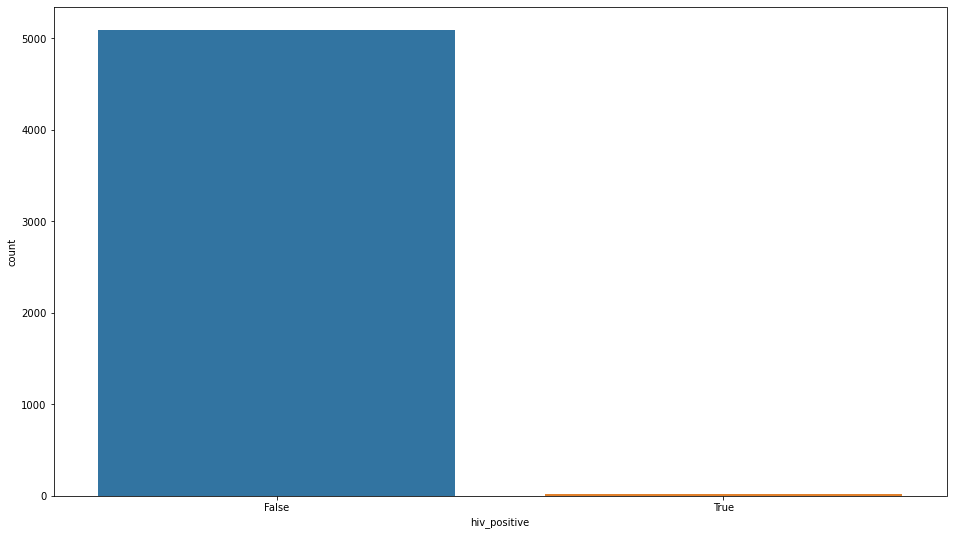

hypertension


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


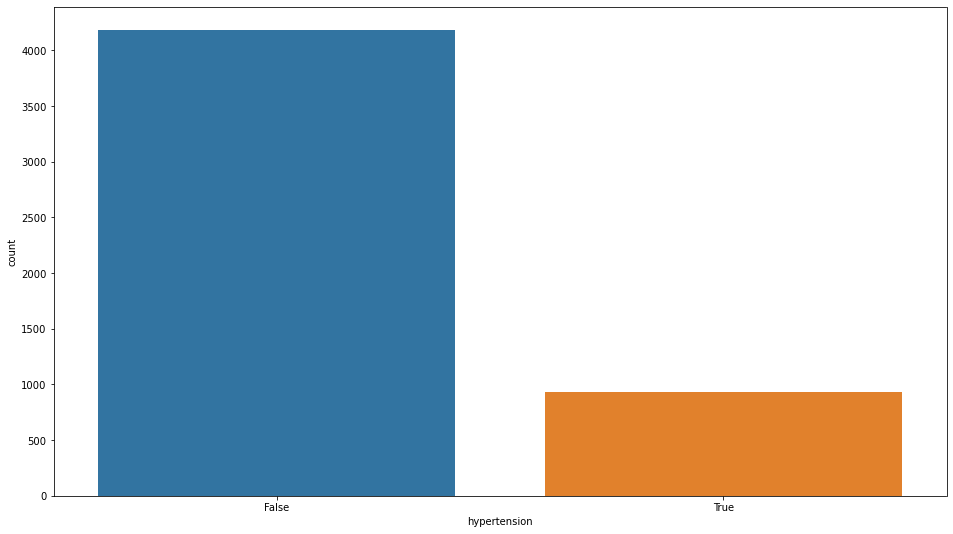

other_chronic


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


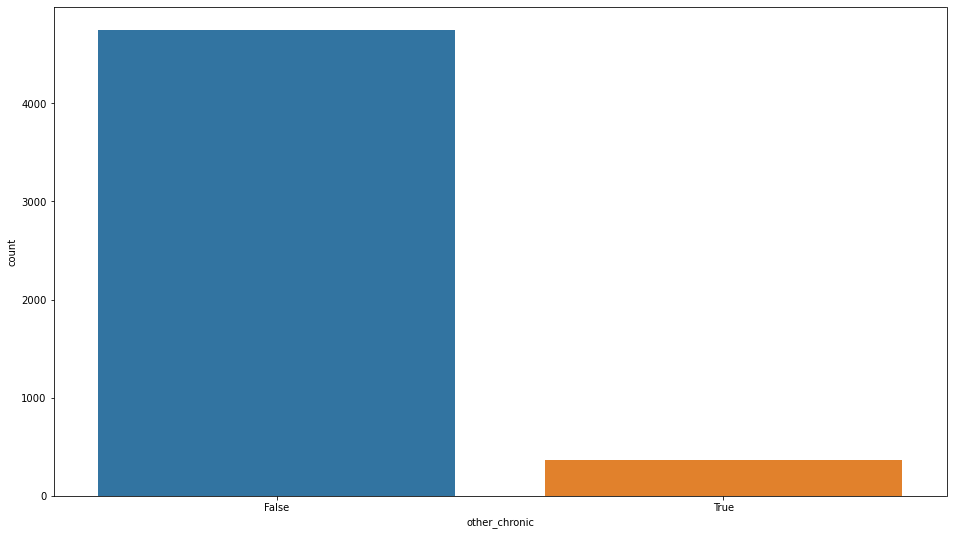

nursing_home


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


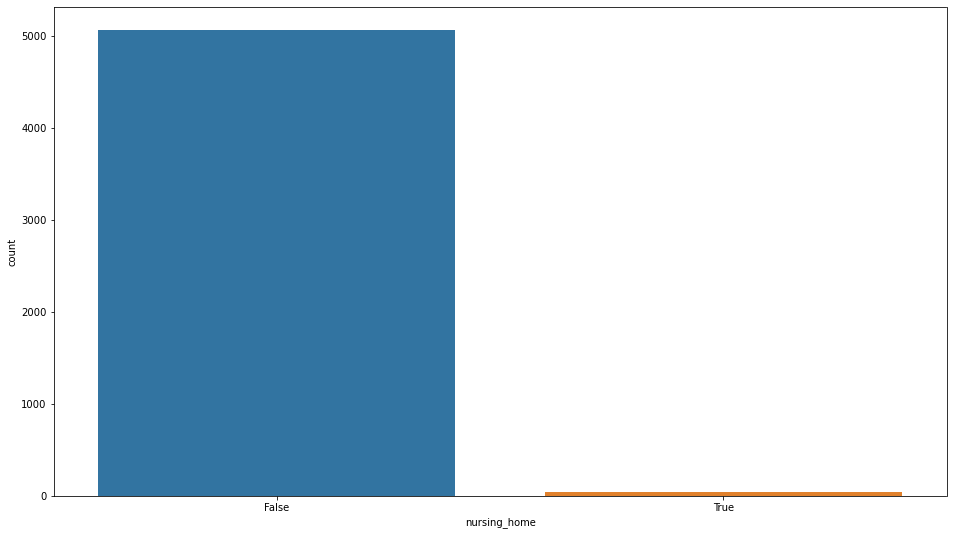

health_worker


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


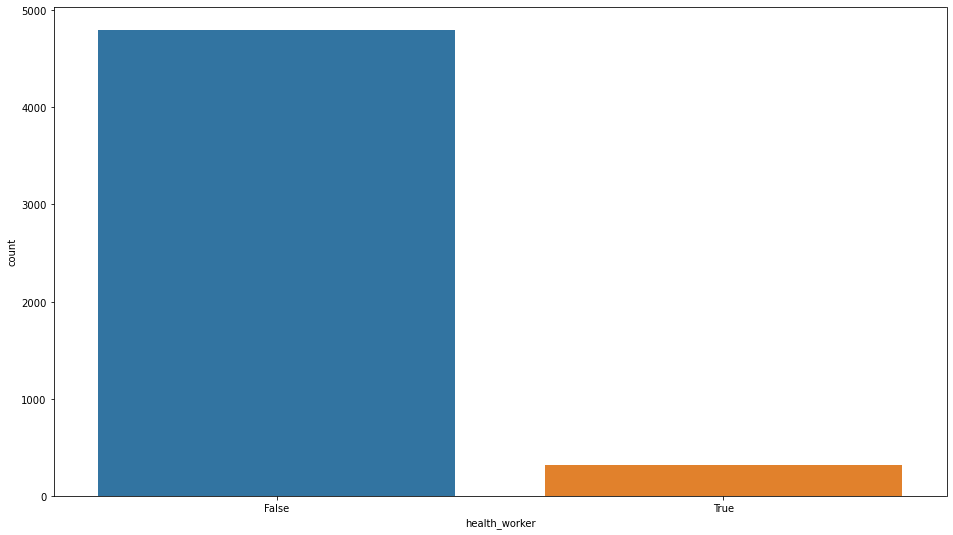

risk_infection


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


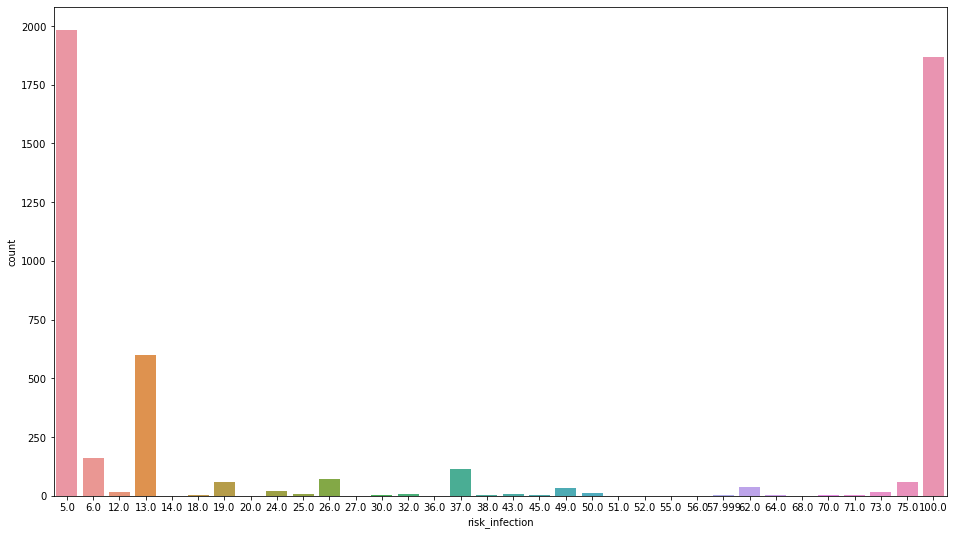

risk_mortality


C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


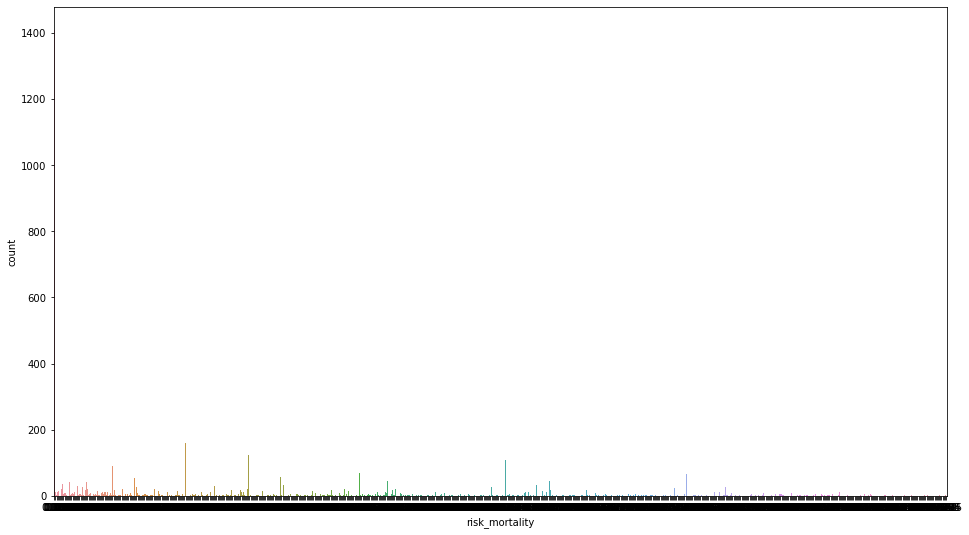

In [30]:
for col in dataset:
    if col == 'survey_date' or col == 'sex' or col == 'contacts_count':
        continue
    print(col)
    # print(dataset.skew(axis=0))
    plt.figure(figsize=(16, 9))
    sns.countplot(dataset[col])
    plt.show()

In [60]:
dataset['age'].max()

100110

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contacts_count', ylabel='count'>

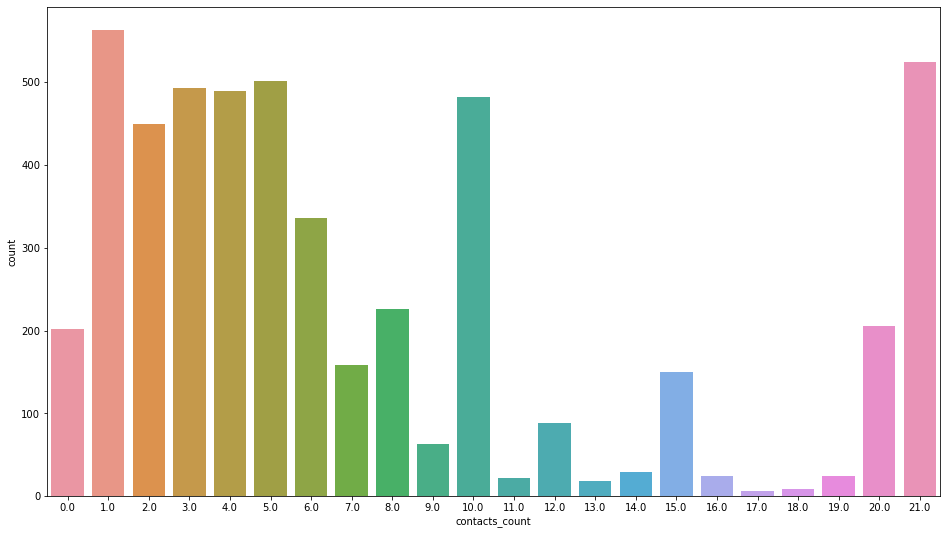

In [32]:
plt.figure(figsize=(16, 9))
sns.countplot(dataset['contacts_count'])

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='worried', ylabel='count'>

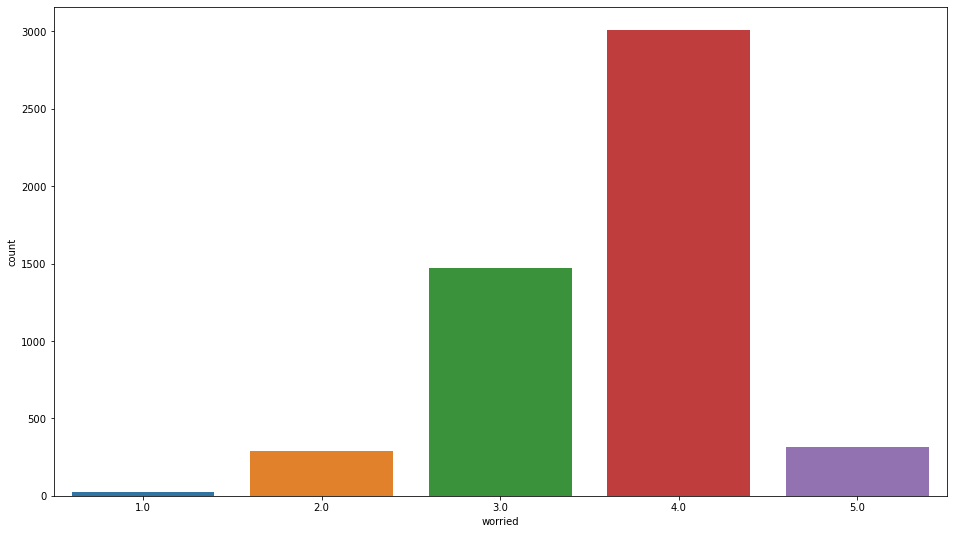

In [34]:
plt.figure(figsize=(16, 9))
sns.countplot(dataset['worried'])

In [63]:
dataset['covid19_symptoms'].sum()
# sns.distplot(dataset['covid19_symptoms'])

608

In [64]:
# sns.distplot(dataset['asthma'])
dataset['asthma'].sum()

633

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

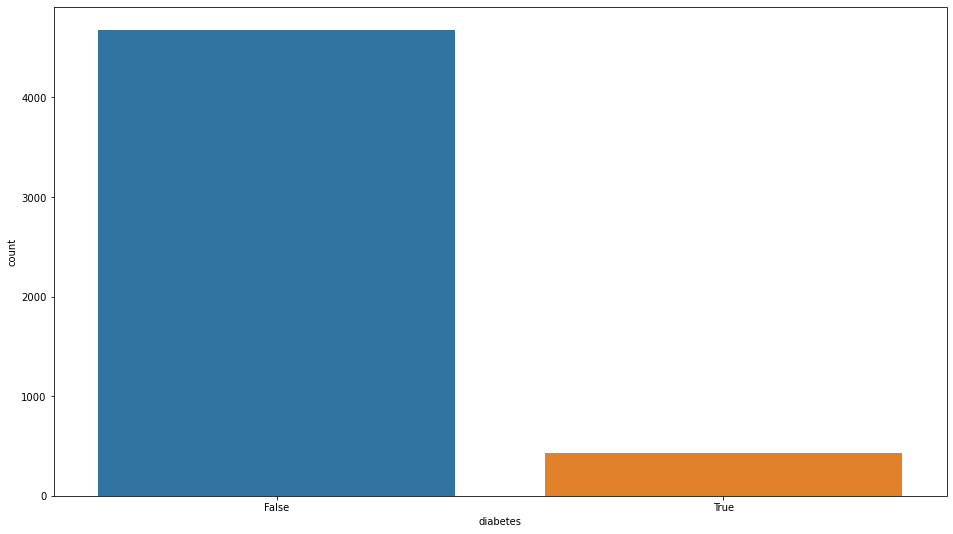

In [35]:
plt.figure(figsize=(16, 9))
sns.countplot(dataset['diabetes'])
# dataset['diabetes'].sum()

C:\Users\Prajwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kidney_disease', ylabel='count'>

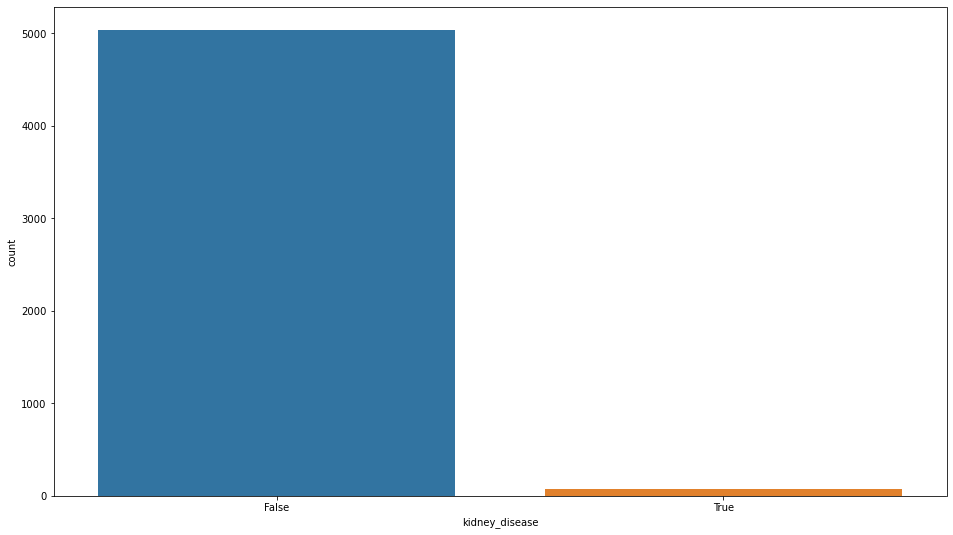

In [37]:
plt.figure(figsize=(16, 9))
sns.countplot(dataset['kidney_disease'])

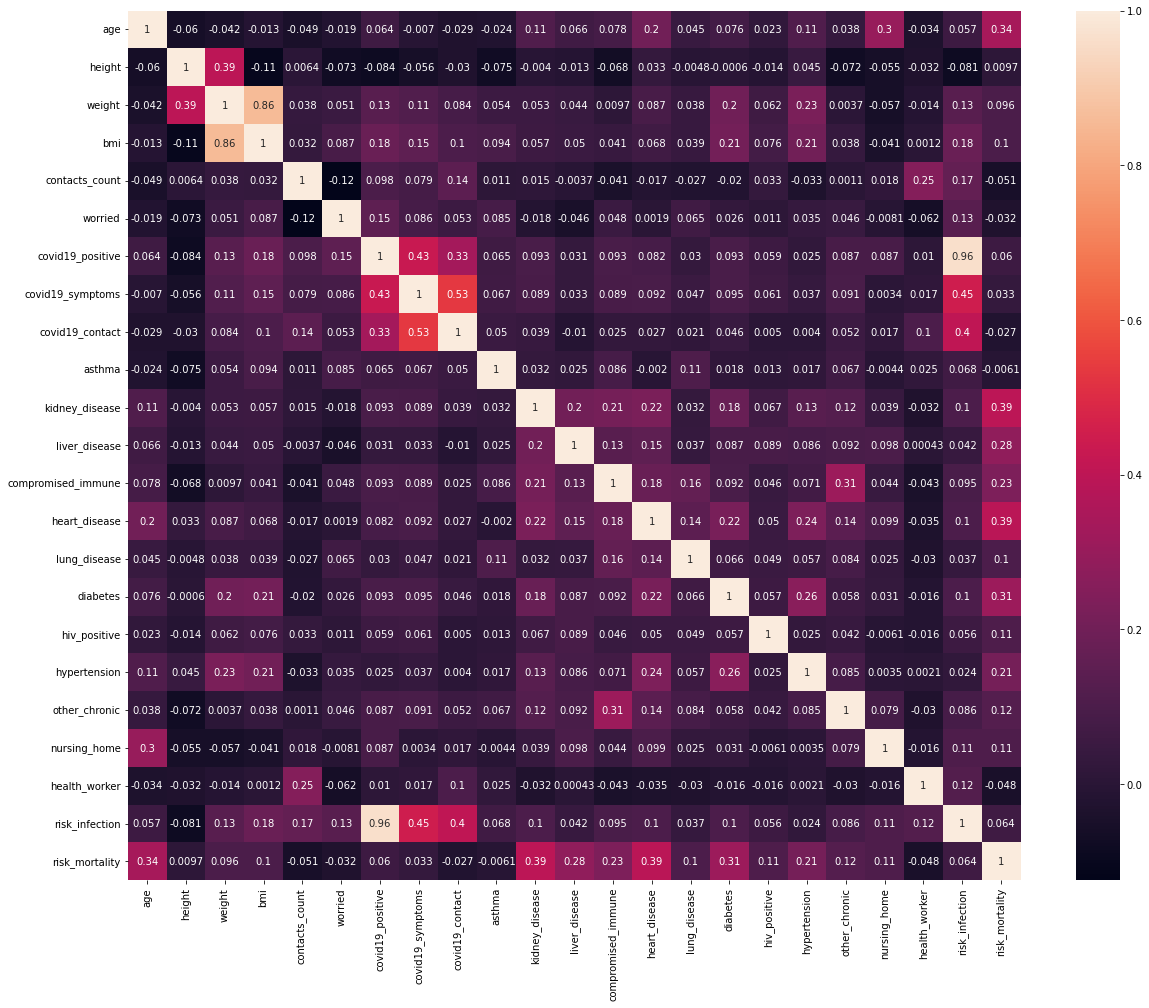

In [67]:
plt.figure(figsize=(20, 16))
dataset.corr()
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## Applying the one-hot-Encoding.

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   sex                     5111 non-null   object 
 2   age                     5111 non-null   int32  
 3   height                  5111 non-null   int64  
 4   weight                  5111 non-null   int64  
 5   bmi                     5111 non-null   float64
 6   blood_type              5111 non-null   object 
 7   insurance               5111 non-null   object 
 8   income                  5111 non-null   object 
 9   race                    5111 non-null   object 
 10  smoking                 5111 non-null   object 
 11  contacts_count          5065 non-null   float64
 12  public_transport_count  5111 non-null   object 
 13  working                 5065 non-null   object 
 14  worried                 5111 non-null   

## Applying one-hot on sex, age, blood_type, insurance, income, race, smoking

In [69]:
dataset_final = dataset.drop(columns = ['survey_date', 'contacts_count', 'public_transport_count', 'working'])

In [70]:
dataset_final

,sex,age,height,weight,bmi,blood_type,insurance,income,race,smoking,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,male,5060,184,80,23.6,ap,yes,med,white,never,...,False,False,False,False,False,False,False,False,100.0,0.194
1,female,8090,164,84,31.2,ap,yes,med,white,never,...,False,False,False,False,True,False,False,False,100.0,3.483
2,female,2030,170,64,22.1,ap,yes,med,white,never,...,False,False,False,False,False,False,False,False,100.0,0.050
3,male,90100,132,124,71.1,op,yes,med,white,quit5,...,False,False,False,True,False,False,False,False,100.0,13.973
4,male,3040,184,118,34.8,op,yes,med,white,never,...,False,False,True,False,True,True,False,False,100.0,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,female,7080,166,66,23.9,op,yes,high,white,quit10,...,False,False,False,False,False,False,False,False,5.0,1.496
5107,male,7080,168,70,24.8,bp,yes,med,asian,never,...,False,False,False,False,False,False,False,False,5.0,3.510
5108,male,7080,182,82,24.7,op,yes,high,white,never,...,False,False,False,False,True,False,False,False,5.0,2.171
5109,male,5060,184,80,23.6,ap,yes,high,white,never,...,False,False,False,False,False,False,False,False,5.0,0.557


In [71]:
dataset_encoded = dataset_final
dataset_encoded.columns

Index(['sex', 'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance',
       'income', 'race', 'smoking', 'worried', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker', 'risk_infection', 'risk_mortality'],
      dtype='object')

In [72]:
# Double checking the Nans in datset

dataset_encoded.isnull().sum()

sex                   0
age                   0
height                0
weight                0
bmi                   0
blood_type            0
insurance             0
income                0
race                  0
smoking               0
worried               0
covid19_positive      0
covid19_symptoms      0
covid19_contact       0
asthma                0
kidney_disease        0
liver_disease         0
compromised_immune    0
heart_disease         0
lung_disease          0
diabetes              0
hiv_positive          0
hypertension          0
other_chronic         0
nursing_home          0
health_worker         0
risk_infection        0
risk_mortality        0
dtype: int64

In [73]:
dataset_encoded['sex'].value_counts()

male      2658
female    2441
other       12
Name: sex, dtype: int64

In [74]:
dataset_encoded["sex"].replace(
    to_replace= "other", 
    value = "female",
    inplace= True
)
dataset_encoded['sex'].value_counts()

male      2658
female    2453
Name: sex, dtype: int64

In [75]:
dataset_encoded = dataset_encoded.astype({"sex": object})

In [76]:
dataset_encoded.head()

,sex,age,height,weight,bmi,blood_type,insurance,income,race,smoking,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,male,5060,184,80,23.6,ap,yes,med,white,never,...,False,False,False,False,False,False,False,False,100.0,0.194
1,female,8090,164,84,31.2,ap,yes,med,white,never,...,False,False,False,False,True,False,False,False,100.0,3.483
2,female,2030,170,64,22.1,ap,yes,med,white,never,...,False,False,False,False,False,False,False,False,100.0,0.050
3,male,90100,132,124,71.1,op,yes,med,white,quit5,...,False,False,False,True,False,False,False,False,100.0,13.973
4,male,3040,184,118,34.8,op,yes,med,white,never,...,False,False,True,False,True,True,False,False,100.0,0.116


In [77]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [78]:
encoder_df = pd.DataFrame(encoder.fit_transform(dataset_encoded[['sex']]).toarray())
final_df = dataset_encoded.join(encoder_df)

final_df.head()

,sex,age,height,weight,bmi,blood_type,insurance,income,race,smoking,...,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality,0,1
0,male,5060,184,80,23.6,ap,yes,med,white,never,...,False,False,False,False,False,False,100.0,0.194,0.0,1.0
1,female,8090,164,84,31.2,ap,yes,med,white,never,...,False,False,True,False,False,False,100.0,3.483,1.0,0.0
2,female,2030,170,64,22.1,ap,yes,med,white,never,...,False,False,False,False,False,False,100.0,0.050,1.0,0.0
3,male,90100,132,124,71.1,op,yes,med,white,quit5,...,False,True,False,False,False,False,100.0,13.973,0.0,1.0
4,male,3040,184,118,34.8,op,yes,med,white,never,...,True,False,True,True,False,False,100.0,0.116,0.0,1.0


In [79]:
encoder_df = pd.DataFrame(encoder.fit_transform(dataset_encoded[['age', 'blood_type', 'insurance', 'income', 'race', 'smoking']]).toarray())
final_df = dataset_encoded.join(encoder_df)

final_df.head()

,sex,age,height,weight,bmi,blood_type,insurance,income,race,smoking,...,32,33,34,35,36,37,38,39,40,41
0,male,5060,184,80,23.6,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,female,8090,164,84,31.2,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,female,2030,170,64,22.1,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,male,90100,132,124,71.1,op,yes,med,white,quit5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,3040,184,118,34.8,op,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
final_df.head(10)

,sex,age,height,weight,bmi,blood_type,insurance,income,race,smoking,...,32,33,34,35,36,37,38,39,40,41
0,male,5060,184,80,23.6,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,female,8090,164,84,31.2,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,female,2030,170,64,22.1,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,male,90100,132,124,71.1,op,yes,med,white,quit5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,3040,184,118,34.8,op,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,female,3040,162,66,25.1,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,male,4050,174,84,27.7,ap,yes,med,white,quit0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,female,3040,160,54,21.0,op,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,male,2030,180,84,25.9,ap,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,male,5060,168,70,24.8,abp,yes,med,white,never,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
final_df = final_df.drop(columns=['sex', 'age', 'blood_type', 'insurance', 'income', 'race', 'smoking'])

## Train-Test Spliting

In [82]:
final_df.shape

(5111, 63)

In [83]:
final_df.columns

Index([            'height',             'weight',                'bmi',
                  'worried',   'covid19_positive',   'covid19_symptoms',
          'covid19_contact',             'asthma',     'kidney_disease',
            'liver_disease', 'compromised_immune',      'heart_disease',
             'lung_disease',           'diabetes',       'hiv_positive',
             'hypertension',      'other_chronic',       'nursing_home',
            'health_worker',     'risk_infection',     'risk_mortality',
                          0,                    1,                    2,
                          3,                    4,                    5,
                          6,                    7,                    8,
                          9,                   10,                   11,
                         12,                   13,                   14,
                         15,                   16,                   17,
                         18,                   19, 

In [84]:
y = final_df['risk_mortality']
x = final_df.drop(columns = ['risk_mortality'])

In [85]:
y.shape

(5111,)

In [86]:
x.shape

(5111, 62)

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [88]:
y_train.shape

(4088,)

In [89]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 42)
regressor.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=2000, random_state=42)

In [90]:
predictions = regressor.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.2 degrees.


In [91]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.9 %.
